In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [85]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/ecg vs r-r values/3000-4000.csv")

In [86]:
df.head(1000)

,ecg,Rrvalues
0,-1.3829,0.750
1,-1.3736,0.726
2,-1.3665,0.710
3,-1.3604,0.719
4,-1.3765,0.715
...,...,...
995,-1.3561,0.695
996,-1.3610,0.668
997,-1.3474,0.664
998,-1.3658,0.666


In [87]:
df.describe()

,ecg,Rrvalues
count,1000.000000,1000.000000
mean,-1.367230,0.710268
std,0.017352,0.051591
min,-1.512800,0.593000
25%,-1.375900,0.674000
50%,-1.366700,0.712000
75%,-1.358100,0.740000
max,-1.241700,1.387000


In [88]:
df.shape

(1000, 2)

In [89]:
cdf = df[['ecg','Rrvalues']]
cdf.head(5)

,ecg,Rrvalues
0,-1.3829,0.750
1,-1.3736,0.726
2,-1.3665,0.710
3,-1.3604,0.719
4,-1.3765,0.715


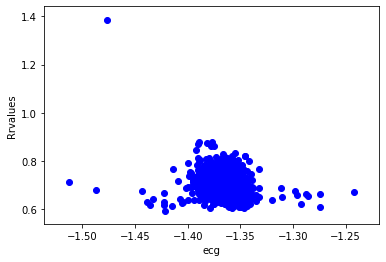

In [90]:
#graph of SNO vs r-r values

plt.scatter(cdf.ecg, cdf.Rrvalues,color='blue')
plt.xlabel('ecg')
plt.ylabel('Rrvalues')
plt.show()

In [91]:
#splitting our data in 80-20 ratio for regression

In [92]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

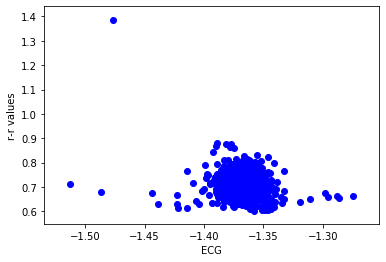

In [93]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.xlabel("ECG")
plt.ylabel("r-r values")
plt.show()

In [94]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.52169202]]
Intercept:  [-0.00184778]


Text(0, 0.5, 'r-r values')

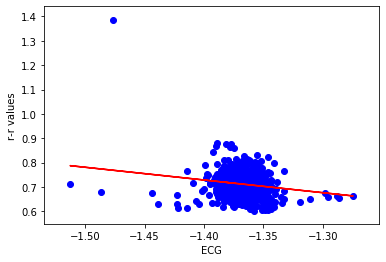

In [95]:
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ECG")
plt.ylabel("r-r values")

In [96]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -22.31


In [97]:
#using polynomial regression

In [98]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -1.3829    ,  1.91241241],
       [ 1.        , -1.3736    ,  1.88677696],
       [ 1.        , -1.3604    ,  1.85068816],
       ...,
       [ 1.        , -1.3474    ,  1.81548676],
       [ 1.        , -1.3658    ,  1.86540964],
       [ 1.        , -1.374     ,  1.887876  ]])

In [99]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.         2.09863187 0.95059115]]
Intercept:  [1.8035116]


Text(0, 0.5, 'Rrvalues')

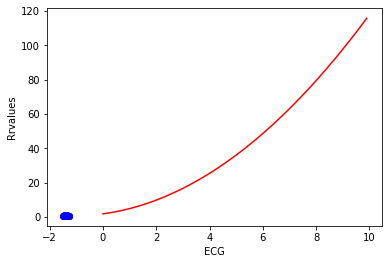

In [100]:
#plotting the polynomial regression
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ECG")
plt.ylabel("Rrvalues")

In [101]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -27.21
